# Web APIs & Classification

## Project Challenge Statement

### Goal: 
#### 1. Using Reddit's API, collect posts from Three subreddits: AskWomen, AskMen, Relationship_Advice. 
#### 2. NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.

### Datasets: 
1. AskMen vs AskWomen (0, 1)
2. Relationship Advice vs AskWomen (1, 0)

### Baseline Model Building 
Baseline models are built without using tokenizers, 
#### 1. CountVectorizer Model 
- with Logistic Regression 
- with Multinomial NB

#### 2. TF-IDF Model
- with Logistic Regression 
- with Multinomial NB

## Table of Contents 

This Notebook is broken down into different sections for analysis purpose. The following links are connected to differenct section within the Notebook for simple navigation. 

### Contents:
[Models](#Models)
1. [CountVectorizer Model With Logistic Regression](#CountVectorizer-Model-With-Logistic-Regression)
   1. AskMen vs AskWomen (0, 1)
    2. Relationship Advice vs AskWomen (1, 0)
    
    
2. [CountVectorizer Model With Multinomial NB](#CountVectorizer-Model-With-Multinomial-NB)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
    
3. [TFIDF Model With Logistic Regression](#TFIDF-Model-With-Logistic-Regression)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
    
4. [TFIDF Model With Multinomial NB](#TFIDF-Model-With-Multinomial-NB)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
    
5. [Random Forest Model Feature Extraction](#Random-Forest-Model-Feature-Extraction)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
6. [Extra Tree Model Feature Extraction](#Extra-Tree-Model-Feature-Extraction)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
    
7. [AdaBoostClassifier Model Feature Extraction](#AdaBoostClassifier-Model-Feature-Extraction)
    1. AskMen vs AskWomen (0, 1)
    2. AskWomen vs Relationship Advice (1, 0)
    
[Model Comparison](#Model-Comparison)
    

In [2]:
# !pip install pactools
import warnings
warnings.filterwarnings('ignore')

##### Libraries 

In [3]:
import pandas as pd 
import numpy as np 
import re
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [5]:
menwomen_df = pd.read_csv('../data/AskMenAskWomen.csv')
womenrelationship_df = pd.read_csv('../data/AskWomen_Relationship.csv')

In [6]:
menwomen_df.head()

,Unnamed: 0,Subreddit,Title_Content
0,0,0,The AskMen Book Club The Picture of Dorian G...
1,1,0,I am starting to realise my dad wont live fore...
2,2,0,What do you see on women s dating profiles tha...
3,3,0,What could women put in their dating profiles ...
4,4,0,What are some things on your mind that you can...


### Tokenizer Function

In [5]:
#build custom tokenizers with lemmaliszer 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def lemma(content):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(content.lower())
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in tokens]
    return(" ".join(tokens_lem))

In [6]:
#build custom tokenizers with lemmaliszer 
from nltk.stem.porter import PorterStemmer

def stemmer(content):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(content.lower())
    p_stemmer = PorterStemmer()
    stem_tokens = [p_stemmer.stem(i) for i in tokens]
    return(" ".join(stem_tokens))

## CountVectorizer Model With Logistic Regression

In [7]:
#building pipeline and gridsearch model 
#pipeline 
loggit_pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('logreg', LogisticRegression())
])

#parameters for grid search 
params_1 = {
    'cvec__stop_words':[None, 'english'],
    'cvec__max_features': [1000, 1500, 2000, 2500],
    'cvec__min_df': [2, 5],
    'cvec__max_df': [.95, 0.99],
    'cvec__ngram_range': [(1,1), (1,2)],
#     'cvec__tokenizer':[None, lemma, stemmer]
}

#gridsearch 
gs1 = GridSearchCV(loggit_pipe, param_grid = params_1 , cv = 3)
gs2 = GridSearchCV(loggit_pipe, param_grid = params_1 , cv = 3)
gs3 = GridSearchCV(loggit_pipe, param_grid = params_1 , cv = 3)

#### Model 1 with menwomen_df

In [8]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [9]:
gs1.fit(X_train, y_train)
gs1.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 1000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [10]:
print('train score', gs1.score(X_train, y_train))
print('test score', gs1.score(X_test, y_test))

train score 0.9117983963344788
test score 0.704


In [7]:
#building a list of records 
model1 = ['CountVectorizer Model With Logistic Regression']
train_score1 = ['0.9117983963344788']
test_score1 = ['0.704']

#### Model 1 with  womenrelationship_df

In [12]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [13]:
gs2.fit(X_train, y_train)
gs2.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [14]:
print('train score', gs2.score(X_train, y_train))
print('test score', gs2.score(X_test, y_test))

train score 0.9991624790619765
test score 0.9766081871345029


In [8]:
#building a list of records 
model2 = ['CountVectorizer Model With Logistic Regression']
train_score2 = ['0.9991624790619765']
test_score2 = ['0.9766081871345029']

## CountVectorizer Model With Multinomial NB

In [17]:
#building pipeline and gridsearch model 
#pipeline 
nb_pipe = Pipeline([
    ('cvec', CountVectorizer()), 
    ('mnb', MultinomialNB())
])

#parameters for grid search 
params_2 = {
    'cvec__stop_words':[None, 'english'],
    'cvec__max_features': [1000, 1500, 2000, 2500],
    'cvec__min_df': [2, 5],
    'cvec__max_df': [.95, 0.99],
    'cvec__ngram_range': [(1,1), (1,2)]
}

#gridsearch 
gs4 = GridSearchCV(nb_pipe, param_grid = params_2 , cv = 3)
gs5 = GridSearchCV(nb_pipe, param_grid = params_2 , cv = 3)
gs6 = GridSearchCV(nb_pipe, param_grid = params_2 , cv = 3)

#### Model 2 with menwomen_df

In [18]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [19]:
gs4.fit(X_train, y_train)
gs4.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 1500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [20]:
print('train score', gs4.score(X_train, y_train))
print('test score', gs4.score(X_test, y_test))

train score 0.8213058419243986
test score 0.7066666666666667


In [9]:
#building a list of records 
model1.append('CountVectorizer_Model_With_Multinomial_NB')
train_score1.append('0.8213058419243986')
test_score1.append(' 0.7066666666666667')

#### Model 2 with  womenrelationship_df

In [23]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [24]:
gs6.fit(X_train, y_train)
gs6.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 1000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None}

In [25]:
print('train score', gs6.score(X_train, y_train))
print('test score', gs6.score(X_test, y_test))

train score 0.981574539363484
test score 0.9727095516569201


In [10]:
#building a list of records 
model2.append('CountVectorizer_Model_With_Multinomial_NB')
train_score2.append('0.981574539363484')
test_score2.append('0.9727095516569201')

## TFIDF Model With Logistic Regression

In [27]:
#building pipeline and gridsearch model 
#pipeline 
loggit_pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('logreg', LogisticRegression())
])

#parameters for grid search 
params_3 = {
    'tfidf__stop_words':[None, 'english'],
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'tfidf__min_df': [2, 5],
    'tfidf__max_df': [.95, 0.99],
    'tfidf__ngram_range': [(1,1), (1,2)]
}

#gridsearch 
gs7 = GridSearchCV(loggit_pipe2, param_grid = params_3 , cv = 3)
gs8 = GridSearchCV(loggit_pipe2, param_grid = params_3 , cv = 3)
gs9 = GridSearchCV(loggit_pipe2, param_grid = params_3 , cv = 3)

#### Model 3 with menwomen_df

In [28]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [29]:
gs7.fit(X_train, y_train)
gs7.best_params_

{'tfidf__max_df': 0.95,
 'tfidf__max_features': 1500,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': None}

In [30]:
print('train score', gs7.score(X_train, y_train))
print('test score', gs7.score(X_test, y_test))

train score 0.8384879725085911
test score 0.728


In [11]:
#building a list of records 
model1.append('TFIDF Model With Logistic Regression')
train_score1.append('0.8384879725085911')
test_score1.append('0.728')

#### Model 3 with  womenrelationship_df

In [32]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [33]:
gs9.fit(X_train, y_train)
gs9.best_params_

{'tfidf__max_df': 0.95,
 'tfidf__max_features': 1000,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': None}

In [34]:
print('train score', gs9.score(X_train, y_train))
print('test score', gs9.score(X_test, y_test))

train score 0.983249581239531
test score 0.9727095516569201


In [12]:
#building a list of records 
model2.append('TFIDF Model With Logistic Regression')
train_score2.append('0.983249581239531')
test_score2.append('0.9727095516569201')

## TFIDF Model With Multinomial NB

In [36]:
#building pipeline and gridsearch model 
#pipeline 
nb_pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('mnb', MultinomialNB())
])

#parameters for grid search 
params_4 = {
    'tfidf__stop_words':[None, 'english'],
    'tfidf__max_features': [1000, 1500, 2000, 2500],
    'tfidf__min_df': [2, 5],
    'tfidf__max_df': [.95, 0.99],
    'tfidf__ngram_range': [(1,1), (1,2)],
#     'tfidf__tokenizer':[None, lemma, stemmer]
}

#gridsearch 
gs10 = GridSearchCV(nb_pipe2, param_grid = params_4 , cv = 3)
gs11 = GridSearchCV(nb_pipe2, param_grid = params_4 , cv = 3)
gs12 = GridSearchCV(nb_pipe2, param_grid = params_4 , cv = 3)

#### Model 4 with menwomen_df

In [37]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [38]:
gs10.fit(X_train, y_train)
gs10.best_params_

{'tfidf__max_df': 0.95,
 'tfidf__max_features': 1000,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': None}

In [39]:
print('train score', gs10.score(X_train, y_train))
print('test score', gs10.score(X_test, y_test))

train score 0.8018327605956472
test score 0.72


In [13]:
#building a list of records 
model1.append('TFIDF Model With Multinomial NB')
train_score1.append('0.8018327605956472')
test_score1.append('0.72')

#### Model 4 with  womenrelationship_df

In [41]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [42]:
gs12.fit(X_train, y_train)
gs12.best_params_

{'tfidf__max_df': 0.95,
 'tfidf__max_features': 1500,
 'tfidf__min_df': 2,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': None}

In [43]:
print('train score', gs12.score(X_train, y_train))
print('test score', gs12.score(X_test, y_test))

train score 0.9840871021775545
test score 0.9610136452241715


In [14]:
#building a list of records 
model2.append('TFIDF Model With Multinomial NB')
train_score2.append('0.9840871021775545')
test_score2.append('0.9610136452241715')

## Random Forest Model Feature Extraction

In [45]:
from pactools.grid_search import GridSearchCVProgressBar

In [46]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

/Users/evelyn/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [47]:
rf_pipe = Pipeline([
    ('cvec', CountVectorizer(max_df= 0.95, 
                       max_features= 1000, 
                       min_df= 5, 
                       ngram_range= (1,1))), 
#     ('tfidf', TfidfVectorizer(max_df= 0.95, 
#                        max_features= 1500, 
#                        min_df= 5, 
#                        ngram_range= (1,2))),
    ('rf', RandomForestClassifier())
])

In [48]:
rf_params = {
    'rf__n_estimators':[50, 100],
    'rf__max_depth': [50, 100, 150, 200],
    'rf__max_features': ['auto', 4,5], 
    'rf__min_samples_leaf' :[2,3,4]
}

gs_rf1 = GridSearchCV(rf_pipe, param_grid = rf_params, cv = 3)
gs_rf2 = GridSearchCV(rf_pipe, param_grid = rf_params, cv = 3)

#### Model 5 with menwomen_df

In [52]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [53]:
gs_rf1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1000, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rf__n_estimators': [50, 100], 'rf__max_depth': [50, 100, 150, 200], 'rf__max_features': ['auto', 4, 5], 'rf__min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
gs_rf1.best_params_

{'rf__max_depth': 100,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 100}

In [55]:
print('train score', gs_rf1.score(X_train, y_train))
print('test score', gs_rf1.score(X_test, y_test))

train score 0.8843069873997709
test score 0.728


In [15]:
#building a list of records 
model1.append('CVEC with Random Forest Model')
train_score1.append('0.8843069873997709')
test_score1.append('0.728')

#### Model 5 with  womenrelationship_df

In [57]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [58]:
gs_rf2.fit(X_train, y_train)
gs_rf2.best_params_

{'rf__max_depth': 50,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 2,
 'rf__n_estimators': 50}

In [59]:
print('train score', gs_rf2.score(X_train, y_train))
print('test score', gs_rf2.score(X_test, y_test))

train score 0.9882747068676717
test score 0.9688109161793372


In [16]:
#building a list of records 
model2.append('CVEC with Random Forest Model')
train_score2.append('0.984087102177554')
test_score2.append (' 0.9785575048732943')

## Extra Tree Model Feature Extraction

In [61]:
et_pipe = Pipeline([
#     ('cvec', CountVectorizer(max_df= 0.95, 
#                        max_features= 1000, 
#                        min_df= 5, 
#                        ngram_range= (1,1))), 
    ('tfidf', TfidfVectorizer(max_df= 0.95, 
                       max_features= 1500, 
                       min_df= 5, 
                       ngram_range= (1,2))),
    ('et', ExtraTreesClassifier())
])

In [62]:
et_params = {
    'et__n_estimators':[50, 100],
    'et__max_depth': [50, 100, 150, 200],
    'et__max_features': ['auto', 4,5], 
    'et__min_samples_leaf' :[2, 3, 4]
}

gs_et1 = GridSearchCV(et_pipe, param_grid = et_params, cv = 3)
gs_et2 = GridSearchCV(et_pipe, param_grid = et_params, cv = 3)

#### Model 6 with Extra Tree menwomen_df

In [63]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [64]:
gs_et1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1500, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True...s='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'et__n_estimators': [50, 100], 'et__max_depth': [50, 100, 150, 200], 'et__max_features': ['auto', 4, 5], 'et__min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [65]:
gs_et1.best_params_

{'et__max_depth': 150,
 'et__max_features': 'auto',
 'et__min_samples_leaf': 3,
 'et__n_estimators': 100}

In [66]:
print('train score', gs_et1.score(X_train, y_train))
print('test score', gs_et1.score(X_test, y_test))

train score 0.9014891179839634
test score 0.7306666666666667


In [17]:
#building a list of records 
model1.append('TFIDF with Extra Tree Model')
train_score1.append('0.9014891179839634')
test_score1.append ('0.7306666666666667')

#### Model 6 with Extra Tree womenrelationship_df

In [68]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [69]:
gs_et2.fit(X_train, y_train)
gs_et2.best_params_

{'et__max_depth': 150,
 'et__max_features': 'auto',
 'et__min_samples_leaf': 2,
 'et__n_estimators': 100}

In [70]:
print('train score', gs_et2.score(X_train, y_train))
print('test score', gs_et2.score(X_test, y_test))

train score 0.9941373534338358
test score 0.9746588693957114


In [18]:
#building a list of records 
model2.append('TFIDF with Extra Tree Model')
train_score2.append('0.9941373534338358')
test_score2.append ('0.9746588693957114')

## AdaBoostClassifier Model Feature Extraction

In [72]:
ada_pipe = Pipeline([
    ('cvec', CountVectorizer(max_df= 0.95, 
                       max_features= 1000, 
                       min_df= 5, 
                       ngram_range= (1,1))),
    
#     ('tfidf', TfidfVectorizer(max_df= 0.95, 
#                        max_features= 1500, 
#                        min_df= 5, 
#                        ngram_range= (1,2))),
    ('ada', AdaBoostClassifier(base_estimator=DecisionTreeClassifier())) 
])

In [73]:
ada_params = {
    'ada__n_estimators': [100, 200, 300],
    'ada__base_estimator__max_depth': [50,100, 200],
    'ada__learning_rate': [.9, 1.]
}

gs_ada1 = GridSearchCV(ada_pipe, param_grid = ada_params, cv = 3)
gs_ada2 = GridSearchCV(ada_pipe, param_grid = ada_params, cv = 3)

#### Model 7 with AdaBoostClassifier menwomen_df

In [74]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [75]:
gs_ada1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1000, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...ne,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'ada__n_estimators': [100, 200, 300], 'ada__base_estimator__max_depth': [50, 100, 200], 'ada__learning_rate': [0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
gs_ada1.best_params_

{'ada__base_estimator__max_depth': 50,
 'ada__learning_rate': 1.0,
 'ada__n_estimators': 100}

In [77]:
print('train score', gs_ada1.score(X_train, y_train))
print('test score', gs_ada1.score(X_test, y_test))

train score 0.9988545246277205
test score 0.6693333333333333


In [19]:
#building a list of records 
model1.append('CVEC with AdaBoostClassifier Model')
train_score1.append('0.9988545246277205')
test_score1.append ('0.6693333333333333')

#### Model 7 with AdaBoostClassifier womenrelationship_df

In [79]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [80]:
gs_ada2.fit(X_train, y_train)
gs_ada2.best_params_

{'ada__base_estimator__max_depth': 100,
 'ada__learning_rate': 0.9,
 'ada__n_estimators': 300}

In [81]:
print('train score', gs_ada2.score(X_train, y_train))
print('test score', gs_ada2.score(X_test, y_test))

train score 1.0
test score 0.9532163742690059


In [20]:
#building a list of records 
model2.append('CVEC with AdaBoostClassifier Model')
train_score2.append('1.0')
test_score2.append ('0.949317738791423')

## Support Vector Machine Feature Extraction

In [83]:
svc_pipe = Pipeline([
    ('cvec', CountVectorizer(max_df= 0.95, 
                       max_features= 1000, 
                       min_df= 5, 
                       ngram_range= (1,1))),
    
#     ('tfidf', TfidfVectorizer(max_df= 0.95, 
#                        max_features= 1500, 
#                        min_df= 5, 
#                        ngram_range= (1,2))),
    ('svc', svm.SVC()) 
])

In [84]:
svc_params = {
    'svc__C': [0.5, 1, 1.5],
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

gs_svc1 = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 3)
gs_svc2 = GridSearchCV(svc_pipe, param_grid = svc_params, cv = 3)

### Model 7 with SVC menwomen_df

In [85]:
X = menwomen_df["Title_Content"]
y = menwomen_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [86]:
gs_svc1.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('cvec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=1000, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        stri...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [0.5, 1, 1.5], 'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
gs_svc1.best_params_

{'svc__C': 1.5, 'svc__kernel': 'rbf'}

In [88]:
print('train score', gs_svc1.score(X_train, y_train))
print('test score', gs_svc1.score(X_test, y_test))

train score 0.7170675830469645
test score 0.6773333333333333


In [21]:
#building a list of records 
model1.append('CVEC with SVC Model')
train_score1.append('0.7170675830469645')
test_score1.append ('0.6773333333333333')

### Model 7 with SVC womenrelationship_df

In [98]:
X = womenrelationship_df["Title_Content"]
y = womenrelationship_df['Subreddit']

#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [99]:
gs_svc2.fit(X_train, y_train)
gs_svc2.best_params_

{'svc__C': 0.5, 'svc__kernel': 'linear'}

In [100]:
print('train score', gs_svc2.score(X_train, y_train))
print('test score', gs_svc2.score(X_test, y_test))

train score 0.9991624790619765
test score 0.9766081871345029


In [22]:
#building a list of records 
model2.append('CVEC with SVC Model')
train_score2.append('0.9991624790619765')
test_score2.append ('0.9766081871345029')

## Model Comparison 

In [23]:
import matplotlib.pyplot as plt

In [24]:
len(model1), len(train_score1), len(test_score1)

(8, 8, 8)

In [25]:
len(model2), len(train_score2), len(test_score2)

(8, 8, 8)

In [26]:
train_score1 = [round(float(i),2) for i in train_score1]

In [27]:
test_score1 = [round(float(i),2) for i in test_score1]

In [28]:
train_score2 = [round(float(i),2) for i in train_score2]

In [29]:
test_score2 = [round(float(i),2) for i in test_score2]

In [30]:
#Building Askmen AskWomen Model DF
men_women_model_df = pd.DataFrame([model1, train_score1, test_score1])
men_women_model_df = men_women_model_df.T
men_women_model_df.columns = ['model_name', 'train_score', 'test_score']
men_women_model_df

,model_name,train_score,test_score
0,CountVectorizer Model With Logistic Regression,0.91,0.7
1,CountVectorizer_Model_With_Multinomial_NB,0.82,0.71
2,TFIDF Model With Logistic Regression,0.84,0.73
3,TFIDF Model With Multinomial NB,0.8,0.72
4,CVEC with Random Forest Model,0.88,0.73
5,TFIDF with Extra Tree Model,0.9,0.73
6,CVEC with AdaBoostClassifier Model,1,0.67
7,CVEC with SVC Model,0.72,0.68


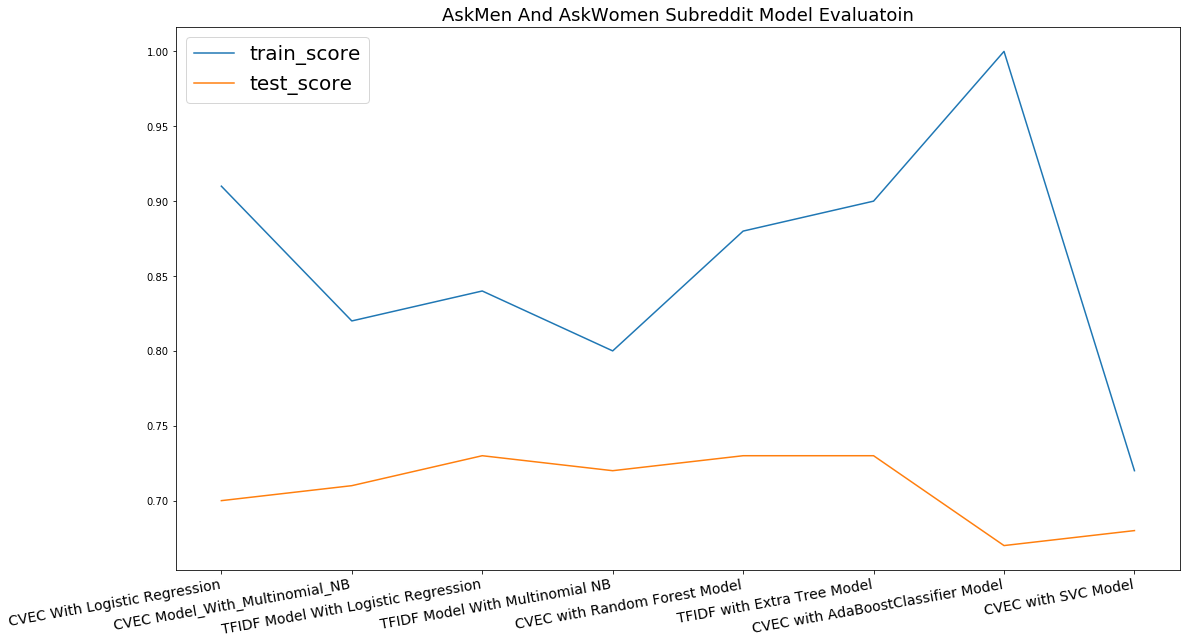

In [41]:
fig = plt.figure(figsize = (18,10))
plt.plot(men_women_model_df['train_score'])
plt.plot(men_women_model_df['test_score'])
ax = plt.gca()
plt.title('AskMen And AskWomen Subreddit Model Evaluatoin', fontsize = 18)
ax.set_xticklabels(['','CVEC With Logistic Regression',
       'CVEC Model_With_Multinomial_NB',
       'TFIDF Model With Logistic Regression',
       'TFIDF Model With Multinomial NB', 'CVEC with Random Forest Model',
       'TFIDF with Extra Tree Model',
       'CVEC with AdaBoostClassifier Model', 'CVEC with SVC Model'], ha = 'right', fontsize = 14)
ax.tick_params(axis='x', rotation= 10)
ax.legend(fontsize = 20)
plt.savefig('../images/AskMenWomen_modeleval.png')

In [32]:
#Building AskWomen Relationship Advice Model DF
women_relationship_model_df = pd.DataFrame([model2, train_score2, test_score2])
women_relationship_model_df = women_relationship_model_df.T
women_relationship_model_df.columns = ['model_name', 'train_score', 'test_score']
women_relationship_model_df

,model_name,train_score,test_score
0,CountVectorizer Model With Logistic Regression,1,0.98
1,CountVectorizer_Model_With_Multinomial_NB,0.98,0.97
2,TFIDF Model With Logistic Regression,0.98,0.97
3,TFIDF Model With Multinomial NB,0.98,0.96
4,CVEC with Random Forest Model,0.98,0.98
5,TFIDF with Extra Tree Model,0.99,0.97
6,CVEC with AdaBoostClassifier Model,1,0.95
7,CVEC with SVC Model,1,0.98


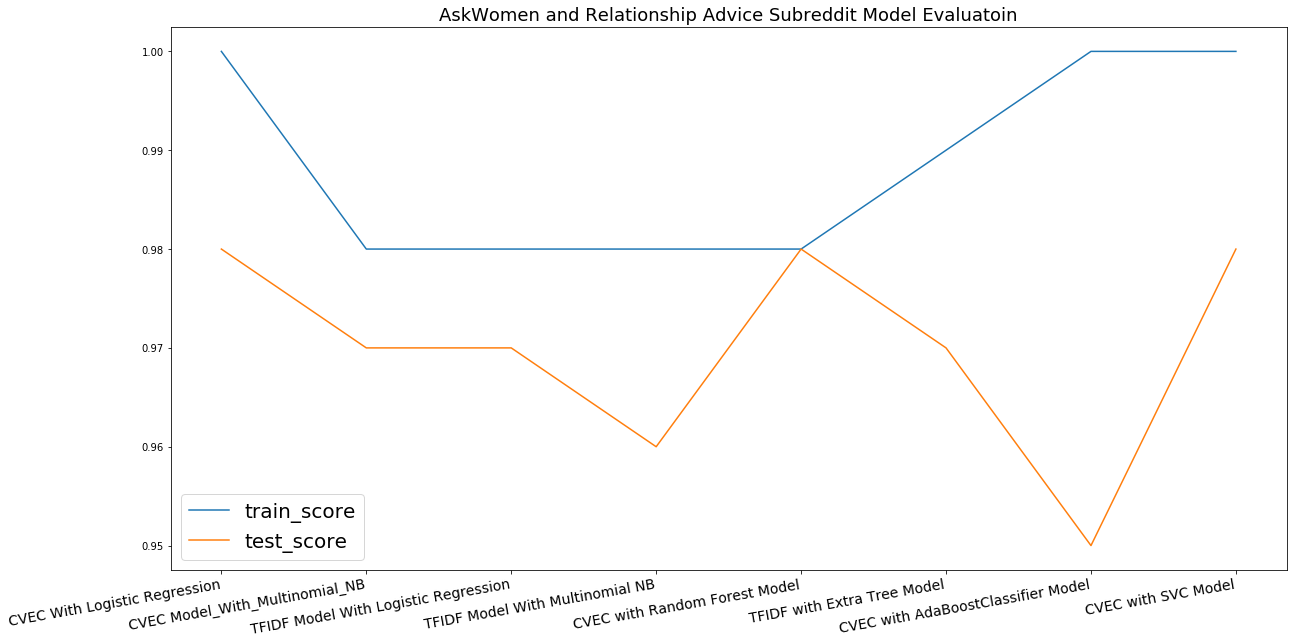

In [42]:
fig = plt.figure(figsize = (20,10))
plt.plot(women_relationship_model_df['train_score'])
plt.plot(women_relationship_model_df['test_score'])
ax = plt.gca()
plt.title('AskWomen and Relationship Advice Subreddit Model Evaluatoin', fontsize = 18)
ax.set_xticklabels(['','CVEC With Logistic Regression',
       'CVEC Model_With_Multinomial_NB',
       'TFIDF Model With Logistic Regression',
       'TFIDF Model With Multinomial NB', 'CVEC with Random Forest Model',
       'TFIDF with Extra Tree Model',
       'CVEC with AdaBoostClassifier Model', 'CVEC with SVC Model'], ha = 'right', fontsize = 14)
ax.tick_params(axis='x', rotation=10);
ax.legend(fontsize = 20)
plt.savefig('../images/AskWomenRelationship_modeleval.png')